In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Question 1 data1**

In [ ]:
import pandas as pd
data1=pd.read_csv(r"/content/drive/MyDrive/data1.txt", delim_whitespace = True, header = None)

In [ ]:
#Normalization
def normalization(X):
    #mean of each feature
    means = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    #standard deviation of each feature
    stddevs = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
        
   #z=(x-mu)/std 
    for i in range (X.shape[1]):
      mu=means[i]
      s=stddevs[i]
      normalized = (X[:,i]-mu)/s
   
    return np.array(normalized).reshape(X.shape[0],X.shape[1])

In [ ]:
#Gradient Descent
def gradient_desc(W,X,Y):
  alpha=0.0001
  grad_W=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))
  W=W-alpha*grad_W/X.shape[0]
  
  return W

In [ ]:
def mse(Y,Y_pred):
  a=Y_pred-Y
  x=np.matmul(np.transpose(a),a)
  return x[0][0]/Y.shape[0]

In the best case, the modeled values exactly match the observed values, which results in R2=1 (But causes overfitting).
A baseline model, which always predicts mean of the output data R2=0.
Models that have worse predictions than this baseline will have a negative R2.


In [ ]:
def r_value(Y,Y_pred):
  a=0
  b=0
  mu=np.mean(Y)
  for i in range (Y.shape[0]):
    a=a+(Y_pred[i][0]-Y[i][0])**2
    b=b+(Y[i][0]-mu)**2
  return (1-a/b)

In [ ]:
#Ridge Regression
def ridge_reg (W,X,Y,lambda_):
  alpha=0.0001
  g=np.matmul(np.transpose(X),(np.matmul(X,W)-Y))

  grad_W=g/X.shape[0]+lambda_*W
  
  W=W-alpha*grad_W
  
  return W

Polynomial Order= 0
Validation error= 7.751330157876403
Validation r^2 value= -1.235874034172984
(70, 1)


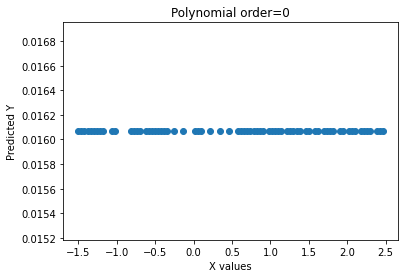

Testing error= 11.015264440248377
Testing r^2 value= -1.813770547527747


Polynomial Order= 1
Validation error= 7.7200818925642505
Validation r^2 value= -1.22686046055383
(70, 1)


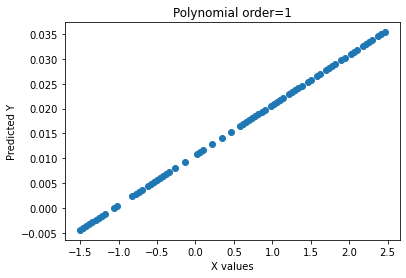

Testing error= 10.999204886399854
Testing r^2 value= -1.8096682493150684


Polynomial Order= 2
Validation error= 7.628110099244556
Validation r^2 value= -1.2003311629530984
(70, 1)


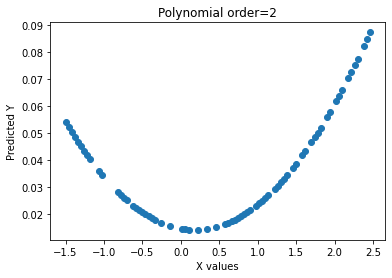

Testing error= 10.853398530919069
Testing r^2 value= -1.7724230582513725


Polynomial Order= 3
Validation error= 7.456330769641521
Validation r^2 value= -1.1507813521665207
(70, 1)


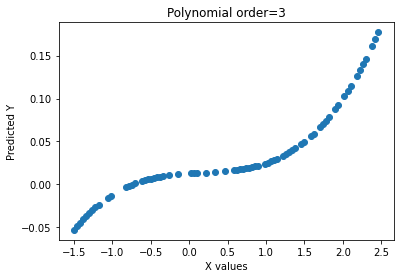

Testing error= 10.810369916407911
Testing r^2 value= -1.7614317063079694


Polynomial Order= 4
Validation error= 6.970540827701635
Validation r^2 value= -1.0106550647909143
(70, 1)


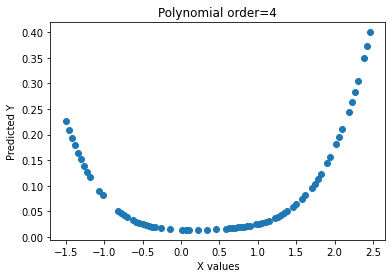

Testing error= 10.404341103829799
Testing r^2 value= -1.6577145490415934


Polynomial Order= 5
Validation error= 6.444346838825409
Validation r^2 value= -0.8588742152201116
(70, 1)


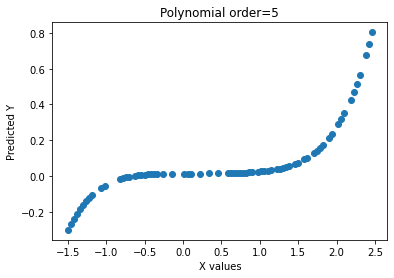

Testing error= 10.21569340360136
Testing r^2 value= -1.6095258427566947


Polynomial Order= 6
Validation error= 11.430967512916789
Validation r^2 value= -2.2972667822225312
(70, 1)


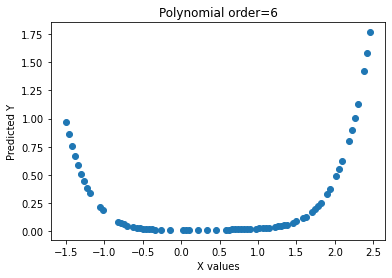

Testing error= 9.100499879728272
Testing r^2 value= -1.3246576301695963


Polynomial Order= 7
Validation error= 58.72623293567843
Validation r^2 value= -15.93960348370074
(70, 1)


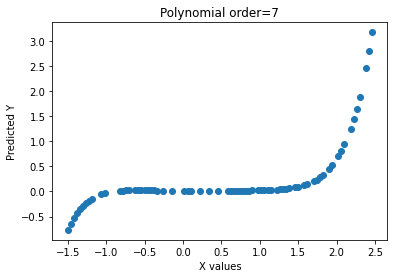

Testing error= 8.697390457983545
Testing r^2 value= -1.2216862104193975


Polynomial Order= 8
Validation error= 416.37305095488347
Validation r^2 value= -119.10295964666525
(70, 1)


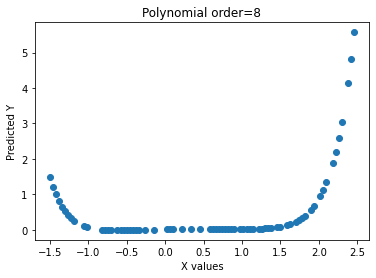

Testing error= 8.28209448519035
Testing r^2 value= -1.1156018233317258


Polynomial Order= 9
Validation error= 1522.2676028763453
Validation r^2 value= -438.09864978147715
(70, 1)


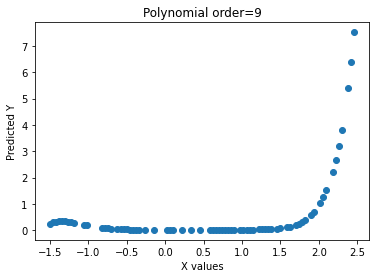

Testing error= 8.827353553168797
Testing r^2 value= -1.2548843539121344


Polynomial Order= 10
Validation error= 4192.625788035487
Validation r^2 value= -1208.364450170807
(70, 1)


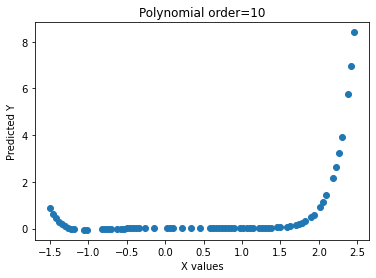

Testing error= 9.820585443178071
Testing r^2 value= -1.5085983390945361




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# d contains all the polynomial orders
d=np.arange(0,11);

data=data1
#Splitting of data
X=data[0:70][0]
Y=data[0:70][1]
X_val=data[70:90][0]
Y_val=data[70:90][1]
X_test=data[90:100][0]
Y_test=data[90:100][1]
#Reshaping data and normalization
X=np.array(X).reshape(70,1)
Y=np.array(Y).reshape(70,1)
X_val=np.array(X_val).reshape(20,1)
Y_val=np.array(Y_val).reshape(20,1)
X_=normalization(X)
X_val_=normalization(X_val)
X_test=np.array(X_test).reshape(10,1)
Y_test=np.array(Y_test).reshape(10,1)
X_test_=normalization(X_test)

error=[]
for pol in range (len(d)):
  
  W=np.zeros((d[pol]+1,1))
  #X_new=[1]
  X_new=X_**0
  X_val_new=X_val_**0
  X_test_new=X_test_**0
  #Example: X_new=[X_new X1^2 X2^2 X1X2 X1 X2]=[1 X1^2 X2^2 X1X2 X1 X2]
  for i in range(1,d[pol]+1):
    X_new=np.column_stack((X_new,X_**i))
    X_val_new=np.column_stack((X_val_new,X_val_**i))
    X_test_new=np.column_stack((X_test_new,X_test_**i))
  
  print("Polynomial Order=",d[pol])

  for epoch in range (100):
    W_new=gradient_desc(W,X_new,Y)
    #Training data prediction
    Y_pred=np.matmul(X_new,W_new)
    
    W=W_new
    Y_val_pred=np.matmul(X_val_new,W_new)
    
  print("Validation error=",mse(Y_val,Y_val_pred))
  print("Validation r^2 value=",r_value(Y_val,Y_val_pred))
  #error data for validation dataset
  error.append(mse(Y_val,Y_val_pred))
  
 #Curve plots for validation dataset y=f(x)
  
  print(Y_pred.shape)
  plt.scatter(X,(Y_pred))
  plt.xlabel('X values') 
  plt.ylabel('Predicted Y')  
  plt.title("Polynomial order="+str(pol))
  plt.show()
  #Testing data prediction
  Y_test_pred=np.matmul(X_test_new,W)
  print("Testing error=",mse(Y_test,Y_test_pred))
  print("Testing r^2 value=",r_value(Y_test,Y_test_pred))
  print("\n")
  



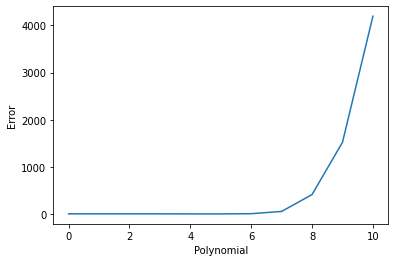

In [ ]:
plt.plot(d,error)
plt.xlabel("Polynomial")
plt.ylabel("Error")
plt.show()

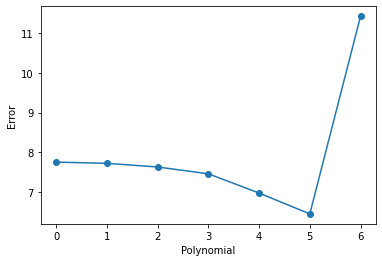

In [ ]:
plt.scatter(d[:7],error[:7])
plt.plot(d[:7],error[:7])
plt.xlabel("Polynomial")
plt.ylabel("Error")
plt.show()

It is not visible from the first error plot but from the second error plot we can clearly view that fifth order is the best suited polynomial function for the given dataset


Polynomial order= 0


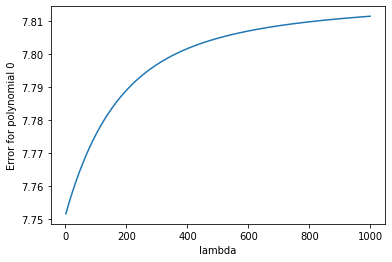

Polynomial order= 1


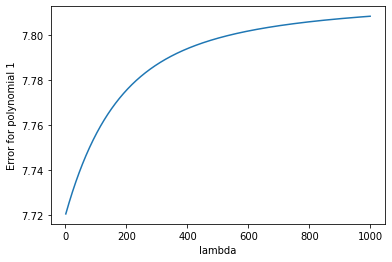

Polynomial order= 2


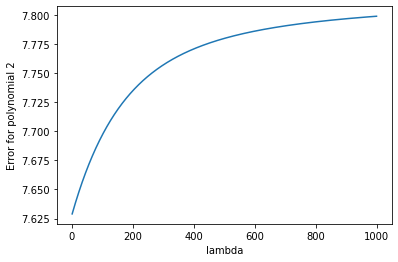

Polynomial order= 3


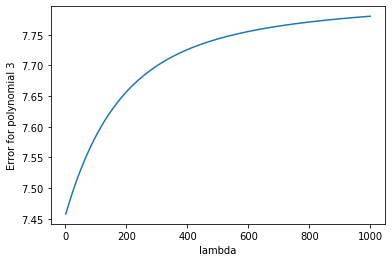

Polynomial order= 4


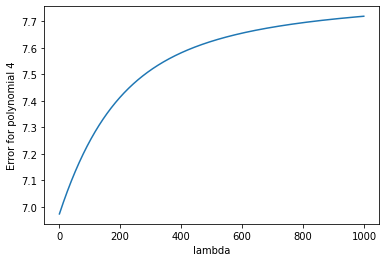

Polynomial order= 5


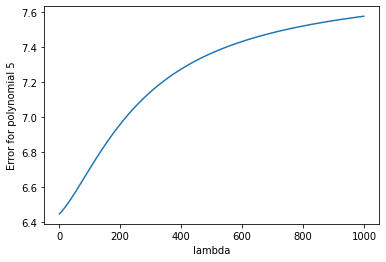

Polynomial order= 6


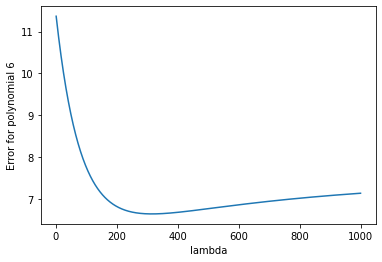

Polynomial order= 7


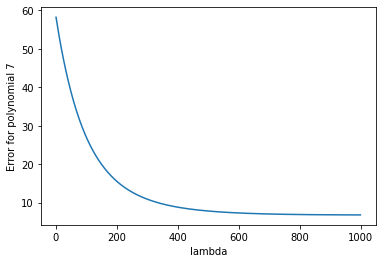

Polynomial order= 8


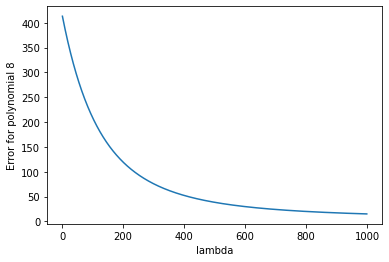

Polynomial order= 9


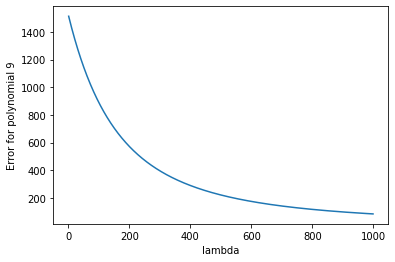

Polynomial order= 10


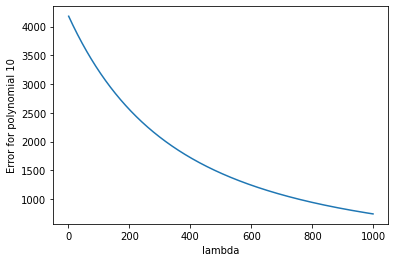

In [ ]:
# A range of lambda values
lambda_=np.arange(1,1000)
error_pols=[]
# Calculating Ridge Regression for each polynomial
for pol in range (len(d)):
  error=[]
  #Calculating ridge regression for each lambda
  for l in range (len(lambda_)):
    #Initialializing W values 
    W=np.zeros((d[pol]+1,1))
    #X_new=[1] 
    X_new=X_**0
    X_val_new=X_val_**0
    X_test_new=X_test_**0
    #Example: X_new=[X_new X1^2 X2^2 X1X2 X1 X2]=[1 X1^2 X2^2 X1X2 X1 X2]
    for i in range(1,d[pol]+1):
      X_new=np.column_stack((X_new,X_**i))
      X_val_new=np.column_stack((X_val_new,X_val_**i))
      X_test_new=np.column_stack((X_test_new,X_test_**i))
    #First epoch may not be able to obtain the optimal value
    for epoch in range (100):
      W_new=ridge_reg(W,X_new,Y,lambda_[l])
      #Training data prediction
      Y_pred=np.matmul(X_new,W_new)
      
      W=W_new
      #PValidation data prediction
      Y_val_pred=np.matmul(X_val_new,W_new)

#Error values for validation data
    error.append(mse(Y_val,Y_val_pred))
 #Plots for validataion error vs lambda for each polynomial   
  
  print("Polynomial order=",d[pol])
  plt.plot(lambda_,error)
  plt.xlabel("lambda")
  plt.ylabel("Error for polynomial "+str(d[pol]))
  plt.show()
